# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import os, cv2
import matplotlib.pyplot as plt

# Image Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

# Building Deep Learning Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras import layers
import tensorflow.keras as k
import tensorflow as tf

# Loading Image

In [2]:
train_path = r"D:\Courses language programming\9_Big Projects\22 - Cleaned vs Dirty V2\plates\train"

In [3]:
# data_train = ImageDataGenerator(preprocessing_function=k.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(229, 229), batch_size=10)

In [4]:
images = []
labels = []


count = 0
class_name  = ['Clean', 'Dirty']

for folder in os.listdir(train_path):
    print(f'Loading Folder {folder} --')
    for img in os.listdir(train_path + '\\' + folder):
        image_path = train_path + '\\' + folder + '\\' + img
        image = cv2.imread(image_path, 0)
        image = cv2.resize(image, (224, 244))
        images.append(image)
        labels.append(count)
    count += 1
        
print(len(images), len(labels), set(labels))

Loading Folder cleaned --
Loading Folder dirty --
40 40 {0, 1}


# Cleaned = 0
# Dirty = 1

In [5]:
labels[-5:]

[1, 1, 1, 1, 1]

In [6]:
images = np.array(images) / 255.0
images = images.astype('float32')

labels = np.array(labels)

In [7]:
training_images, training_labels = shuffle(images, labels)

In [8]:
training_labels[:5]

array([1, 0, 1, 1, 0])

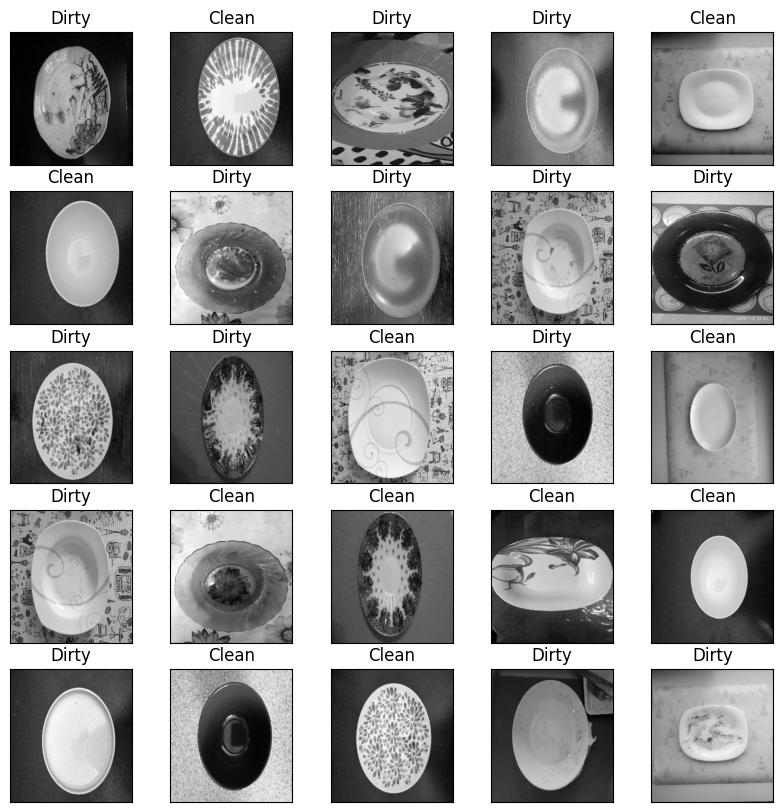

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap="gray")
    plt.title(class_name[training_labels[i]])

# Make Augmentation

In [10]:
data_Aug = tf.keras.Sequential([
        k.layers.RandomFlip("horizontal", (224, 224, 1)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.124),
        ])

In [11]:
images = []
label_image = []

for i in range(40):
    for j in range(5):
        new_img = data_Aug(tf.expand_dims(training_images[i], 0))[0]
        images.append(new_img)
        label_image.append(training_labels[i])
    print(f'Done Loading Image {i}')

Done Loading Image 0
Done Loading Image 1
Done Loading Image 2
Done Loading Image 3
Done Loading Image 4
Done Loading Image 5
Done Loading Image 6
Done Loading Image 7
Done Loading Image 8
Done Loading Image 9
Done Loading Image 10
Done Loading Image 11
Done Loading Image 12
Done Loading Image 13
Done Loading Image 14
Done Loading Image 15
Done Loading Image 16
Done Loading Image 17
Done Loading Image 18
Done Loading Image 19
Done Loading Image 20
Done Loading Image 21
Done Loading Image 22
Done Loading Image 23
Done Loading Image 24
Done Loading Image 25
Done Loading Image 26
Done Loading Image 27
Done Loading Image 28
Done Loading Image 29
Done Loading Image 30
Done Loading Image 31
Done Loading Image 32
Done Loading Image 33
Done Loading Image 34
Done Loading Image 35
Done Loading Image 36
Done Loading Image 37
Done Loading Image 38
Done Loading Image 39


In [12]:
print(len(images), len(label_image), set(label_image))
label_image[:5]

200 200 {0, 1}


[1, 1, 1, 1, 1]

In [13]:
training_images, training_labels = shuffle(images, label_image)
training_labels[:5]

[1, 1, 1, 1, 0]

In [14]:
training_labels = to_categorical(training_labels, 2)
training_labels[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

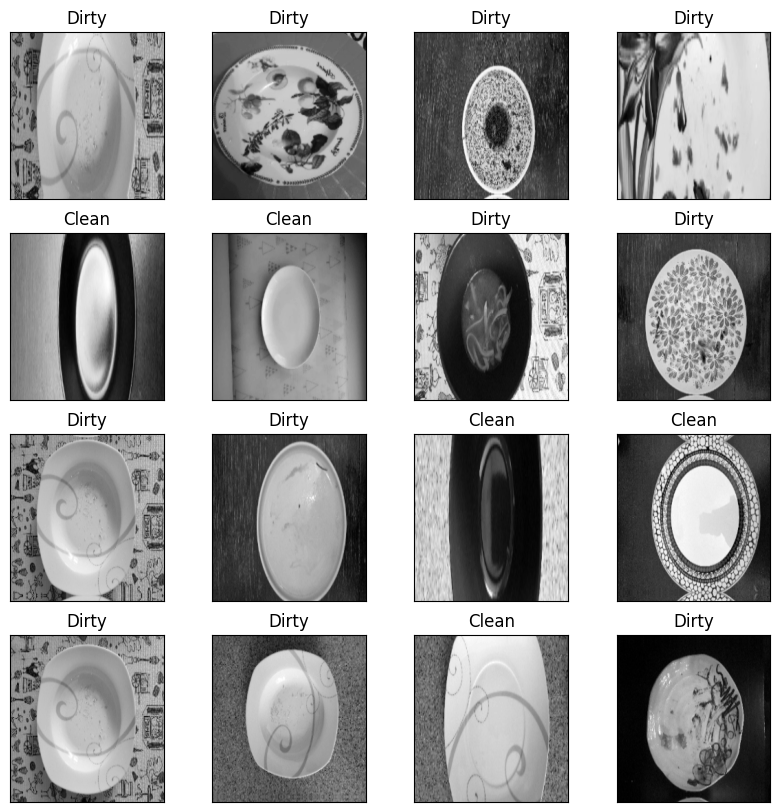

In [15]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap="gray")
    plt.title(class_name[training_labels[i].argmax()])

# Splitting Data

In [16]:
training_images = np.array(training_images)
training_labels = np.array(training_labels)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(training_images, training_labels, train_size=0.8, random_state=42)

In [18]:
print("x_train - shape =", x_train.shape)
print("x_test - shape =", x_test.shape)
print("y_train - shape =", y_train.shape)
print("y_test - shape =", y_test.shape)

x_train - shape = (160, 244, 224)
x_test - shape = (40, 244, 224)
y_train - shape = (160, 2)
y_test - shape = (40, 2)


# Building Model From Scratch

In [19]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(244, 224, 1)))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Dropout(0.2))

model.add(k.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(512, activation='relu'))
model.add(k.layers.Dropout(0.2))
model.add(k.layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 224, 256)     6656      
                                                                 
 max_pooling2d (MaxPooling2  (None, 122, 112, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 112, 256)     1638656   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 56, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 56, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 28, 128)      

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
3/5 [=================>............] - ETA: 24s - loss: 1.1784 - accuracy: 0.5104

In [21]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
5/5 [==============================] - 93s 18s/step - loss: 1.0970 - accuracy: 0.5188 - val_loss: 0.6893 - val_accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 89s 18s/step - loss: 0.6942 - accuracy: 0.5562 - val_loss: 0.7110 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 90s 18s/step - loss: 0.6938 - accuracy: 0.5500 - val_loss: 0.7131 - val_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 91s 18s/step - loss: 0.6854 - accuracy: 0.5750 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 89s 18s/step - loss: 0.6862 - accuracy: 0.5688 - val_loss: 0.7101 - val_accuracy: 0.4250
Epoch 6/10
5/5 [==============================] - 89s 18s/step - loss: 0.6952 - accuracy: 0.5188 - val_loss: 0.6779 - val_accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 88s 18s/step - loss: 0.6978 - accuracy: 0.5250 - val_loss: 0.6946 - val_accuracy: 0.4250
Epoch 8/10
5/5 [===========

# Building Transfer Learning Model

## Inception Model

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_inception = model.fit(data_train, epochs=10, validation_data=data_train)

## Xception

In [ ]:
base_model2 = Xception(weights='imagenet', include_top=False)
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output2 = Dense(2, activation='softmax')(x)
model2 = Model(inputs=base_model2.input, outputs=output2)
model2.summary()

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_xception = model2.fit(data_train, epochs=10, validation_data=data_train)

## Efficient B7

In [ ]:
base_model_b7 = EfficientNetB7(weights='imagenet', include_top=False)
x = base_model_b7.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output_b7 = Dense(2, activation='softmax')(x)
model_b7 = Model(inputs=base_model_b7.input, outputs=output_b7)
model_b7.summary()

In [ ]:
model_b7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_b7 = model_b7.fit(data_train, epochs=10, validation_data=data_train)

In [ ]:
new_model = EfficientNetB7(
    include_top=True,
    weights=None,
    classes=2,
    input_shape=(229, 229, 3),
)
new_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

new_model.summary()

epochs = 40  

In [ ]:
hist = new_model.fit(data_train, epochs=epochs, validation_data=data_train)